# **Final Project by logicaldata**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

## Load Dataset

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

### Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum() # melihat berapa total missing value 

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Ada beberapa kolom dengan nilai kosong yaitu: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount dan DaySinceLastOrder

In [ ]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [ ]:
# Describe variabel numerical
df[nums].describe().transpose()

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

In [ ]:
# Describe variabel categorical
df[cats].describe()

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5630                 5630   5630                5630   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2765                 2314   3384                2050   

       MaritalStatus  
count           5630  
unique             3  
top          Married  
freq            2986

In [ ]:
# See unique values from PreferredLoginDevice
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

Pada variabel PreferredLoginDevice terdapat value yang ambigu antara Mobile Phone dengan Phone.  Perlu dilakukan preprocessing lebih lanjut

In [ ]:
# See unique values from PreferredPaymentMode	
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

Pada variabel PreferredPaymentMode terdapat value yang ambigu antara CC denganCredit Card, dan Cash On Delivery dengan COD. Perlu dilakukan preprocessing lebih lanjut.

In [ ]:
# See unique values from Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# See unique values from PreferedOrderCat
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

Pada variabel PreferredOrderCat terdapat value yang ambigu antara Mobile Phone dengan Phone.  Perlu dilakukan preprocessing lebih lanjut

In [ ]:
# See unique values from MaritalStatus
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
# Melihat value count variabel numerical
for col in nums:
    percent = round(df[col].value_counts()*100/len(df[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom CustomerID:
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

Presentase :
 50001    0.02
53751    0.02
53759    0.02
53758    0.02
53757    0.02
         ... 
51876    0.02
51875    0.02
51874    0.02
51873    0.02
55630    0.02
Name: CustomerID, Length: 5630, dtype: float64
------------------------------

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Presentase :
 0    83.16
1    16.84
Name: Churn, dtype: float64
------------------------------

Value count kolom Tenure:
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29

In [ ]:
# Melihat value count variable categorical
for col in cats:
    percent = round(df[col].value_counts()*100/len(df[col]),2)
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('')
    print('Presentase :\n',percent)
    print('---'*10)
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Presentase :
 Mobile Phone    49.11
Computer        29.02
Phone           21.87
Name: PreferredLoginDevice, dtype: float64
------------------------------

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Presentase :
 Debit Card          41.10
Credit Card         26.66
E wallet            10.91
UPI                  7.35
COD                  6.48
CC                   4.85
Cash on Delivery     2.65
Name: PreferredPaymentMode, dtype: float64
------------------------------

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Presentase :
 Male      60.11
Female    39.89
Name: Gender, dtype: float64
-------------

### Univariate Analysis

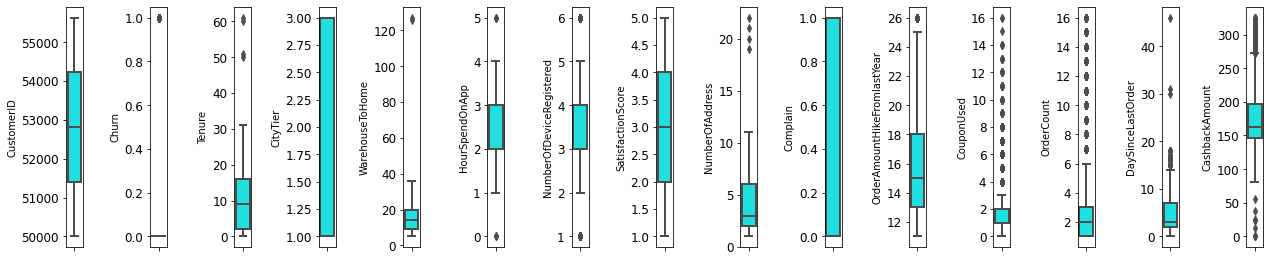

In [ ]:
# Membuat diagram boxplot
plt.figure(figsize=(18,4))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='cyan', orient='v')
    plt.tight_layout(pad = 2)

#### Hasil Observasi 🔽
Hasil yang diperoleh pada diagram diatas terdapat fitur-fitur yang terdistribusi normal seperti CustomerID, CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, Complain dan CashbackAmount.

Terdapat juga outlier yang perlu dilakukan proses pre-processing lebih lanjut.

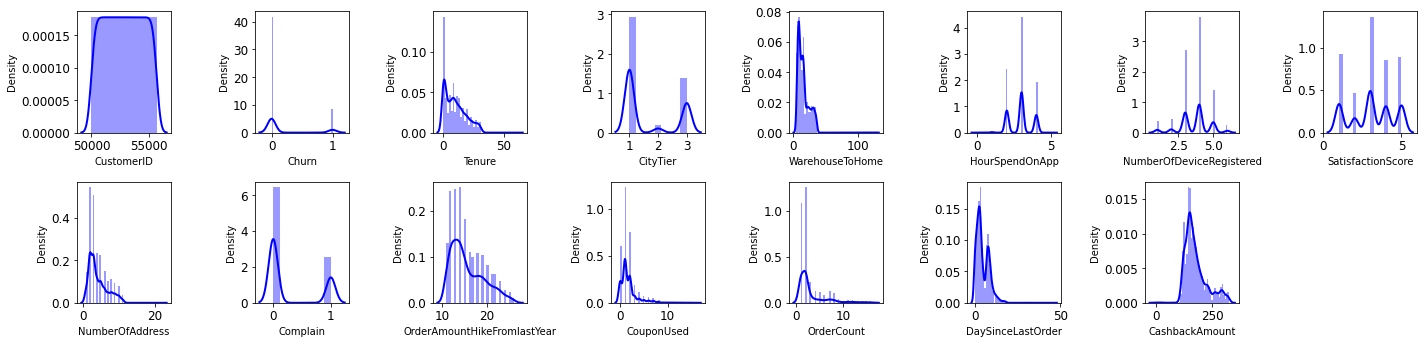

In [ ]:
# Membuat diagram kdeplot untuk melihat distribusi data
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout(pad = 1.5)

#### Hasil Observasi 🔽
Dari diagram diatas terdapat distribusi skew positif ditandai dengan nilai Mean > Median. Terdapat beberapa fitur yang menjadi perhatian seperti Tenure, CouponUsed, DaySinceLastOrder, CashbackAmount

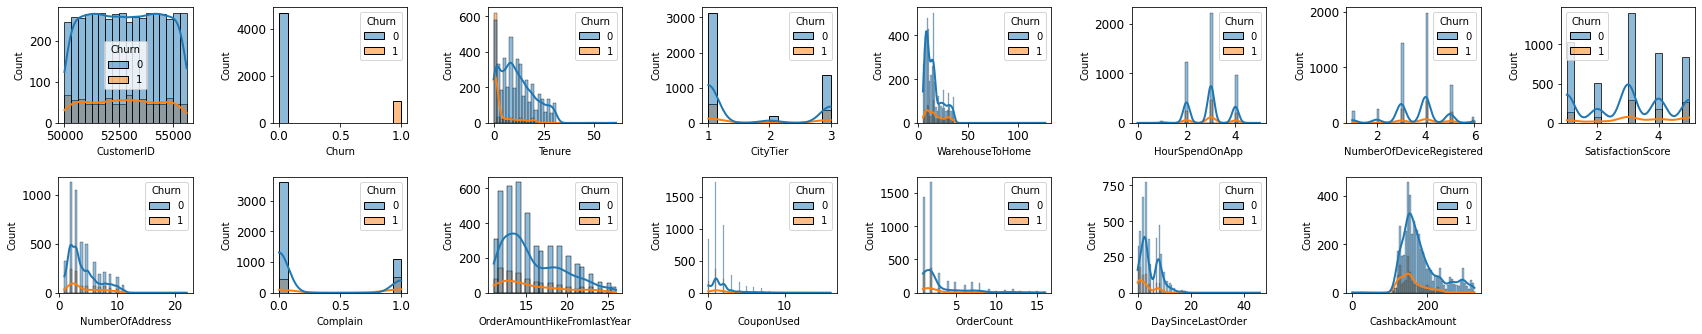

In [ ]:
# KDE plot dengan meng-highlight Churn sebagai variabel target
plt.figure(figsize=(24, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.histplot(data=df, x=df[nums[i]], hue="Churn", kde="True")
    plt.tight_layout(pad = 2)
    

#### Hasil Observasi 🔽
Rata-rata pelanggan menghabiskan waktu selama 3 jam dalam menggunakan aplikasi e-commerce.

Masih banyak pelanggan yang tidak menggunakan kupon dalam berbelanja.

Pelanggan dengan lokasi lebih dekat dengan gudang (< 15 km) labih mendominasi.

Jumlah pelanggan yang melakukan komplain cukup banyak sekitar 1000 orang. Hal ini harus menjadi perhatian dalam perkembangan bisnis ke depannya.

Dengan meng-highlight Churn sebagai variabel target, dapat terlihat persebaran data pelanggan mana yang churn. Dari diagram diatas dapat dilihat proporsi pelanggan yang churn tiap masing-masing fitur.

Variabel Tenure menjadi perhatian karena banyaknya pelanggan churn pada tenure < 3 bulan.

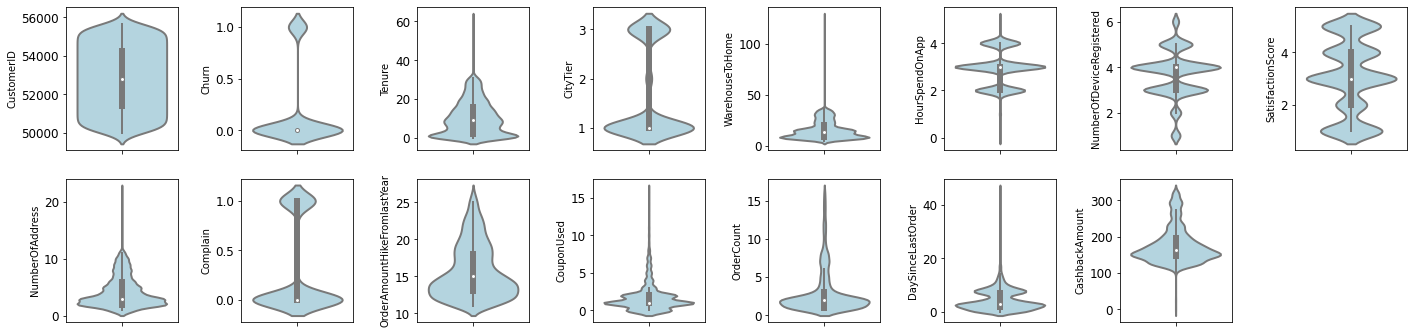

In [ ]:
# Violin plot
plt.figure(figsize=(20, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.violinplot(y=df[nums[i]], color='lightblue', orient='v')
    plt.tight_layout(pad=2)

#### Hasil Observasi 🔽
Diagram violinplot dapat lebih memperlihatkan konsentrasi distribusi data dibandingkan diagram boxplot.

Porsi pelanggan yang churn cukup besar. Bila dilihat dari hasil analisa deskriptif sebelumnya, sebesar 16,84 % dari total pelanggan.

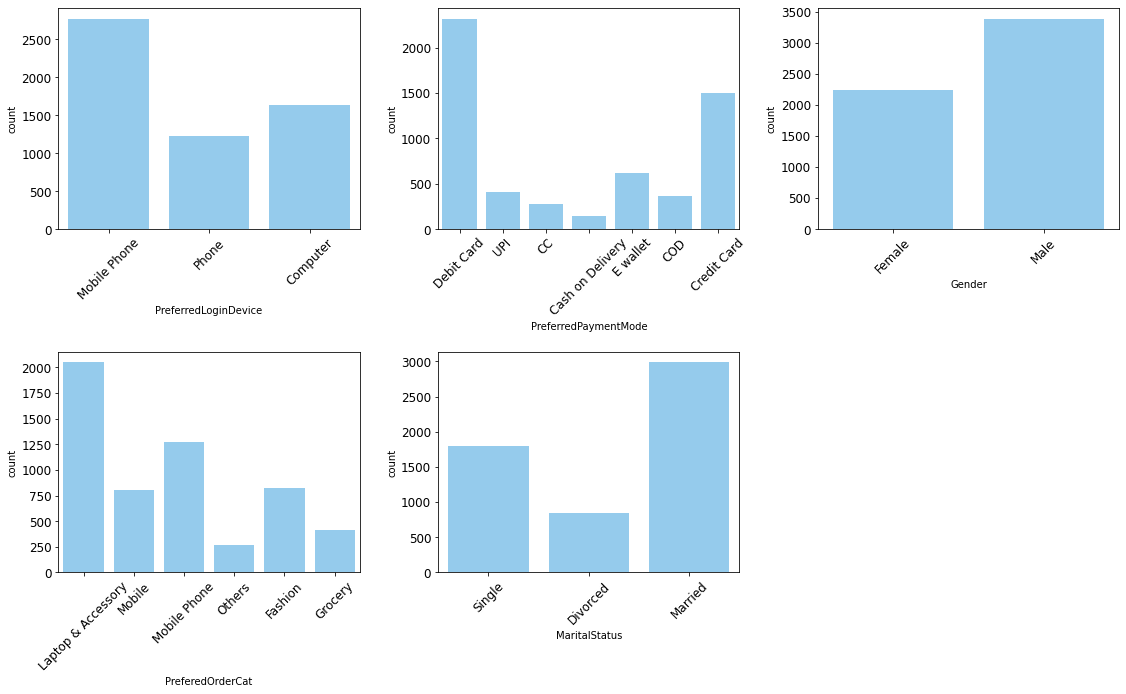

In [ ]:
# Countplot untuk melihat persebaran data variabel categorical 
plt.figure(figsize=(16,10))
for i in range (0, len(cats[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[0:][i]], color='lightskyblue', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

#### Hasil Observasi 🔽
Hampir 50% pelanggan didominasi oleh pelanggan yang bertransaksi melalui aplikasi mobile phone. Metode pembayaran secara Debit Card lebih disukai oleh pelanggan. Pelanggan lebih banyak didominasi oleh Pria dibanding wanita. Hal ini dapat terlihat pada penjualan kategori Laptop & Accessory mengungguli kategori fashion.

Pada variabel PreferredPaymentMode terdapat value yang ambigu antara Cash On Delivery dan COD. Menurut kami perlu dilakukan tindakan pre-processing lebih lanjut.

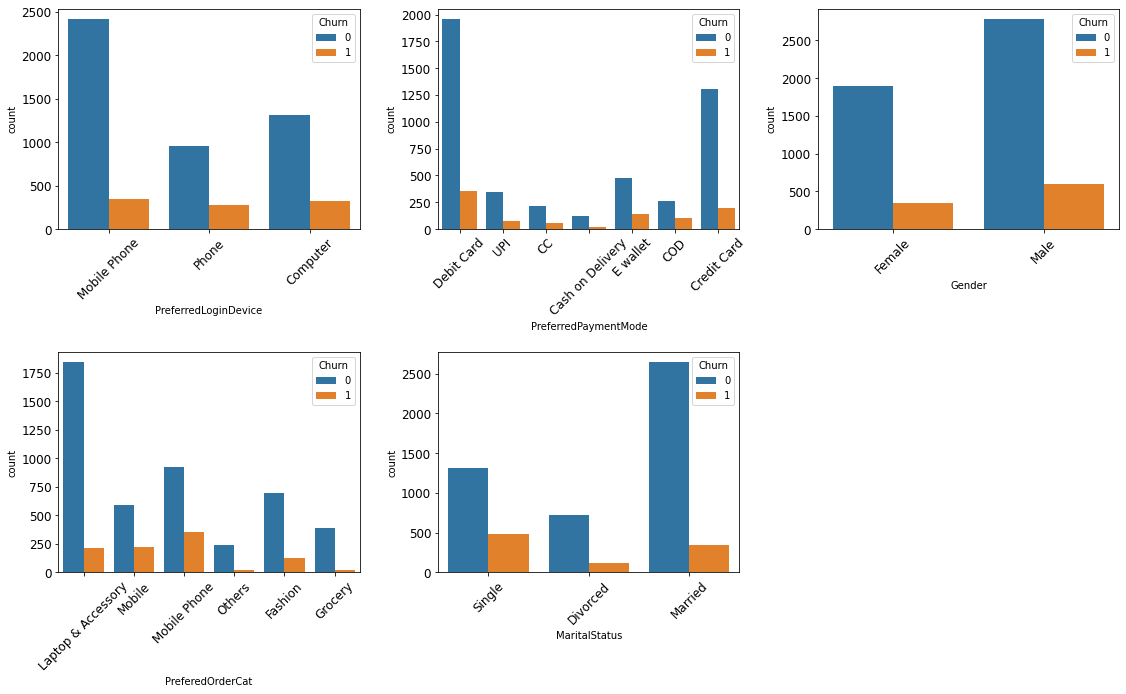

In [ ]:
# Countplot dengan meng-highlight "Churn" sebagai variabel target
plt.figure(figsize=(16,10))
for i in range (0, len(cats[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=df[cats[0:][i]], hue='Churn', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

#### Hasil Observasi 🔽
Persebaran pelanggan churn masih sangat kecil dibanding pelanggan yang tidak melakukan churn. Perlu dilakukan analisa korelasi antara variable numerikal & kategorikal untuk melihat variabel apa yang mempengaruhi tingkat churn.

### Multivariate Analysis

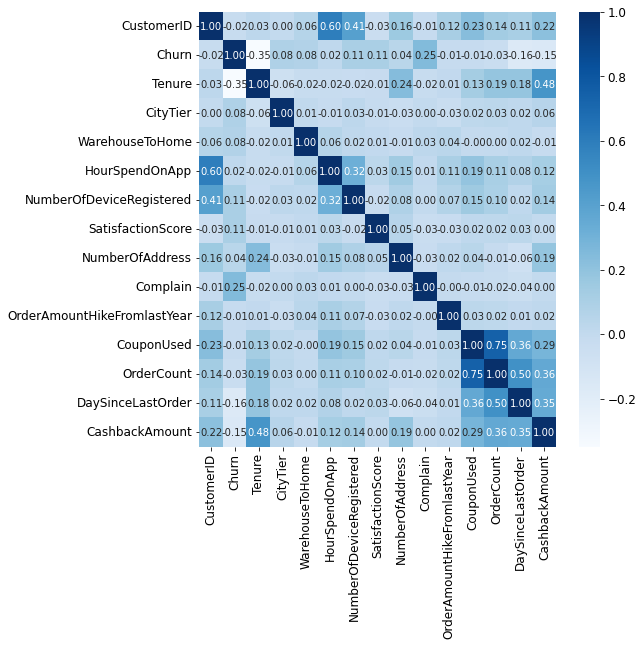

In [ ]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Hasil Observasi**
Dari heatmap di atas dapat diperoleh adanya korelasi fitur dengan target, dimana targetnya adalah churn. Fitur yang memiliki korelasi tinggi dengan target churn adalah Tenure -0,35. Dimana ini termasuk korelasi negatif, artinya nilai tenure semakin besar maka tingkat churn rendah. Selain itu, korelasi fitur lain yang cukup besar yaitu antara churn dengan complain 0,25. Dimana ini termasuk korelasi positif, artinya semakin besar nilai complain semakin besar tingkat churn. 
Sehingga, fitur yang relevan dan harus dipertahankan adalah fitur tenure dan complain.

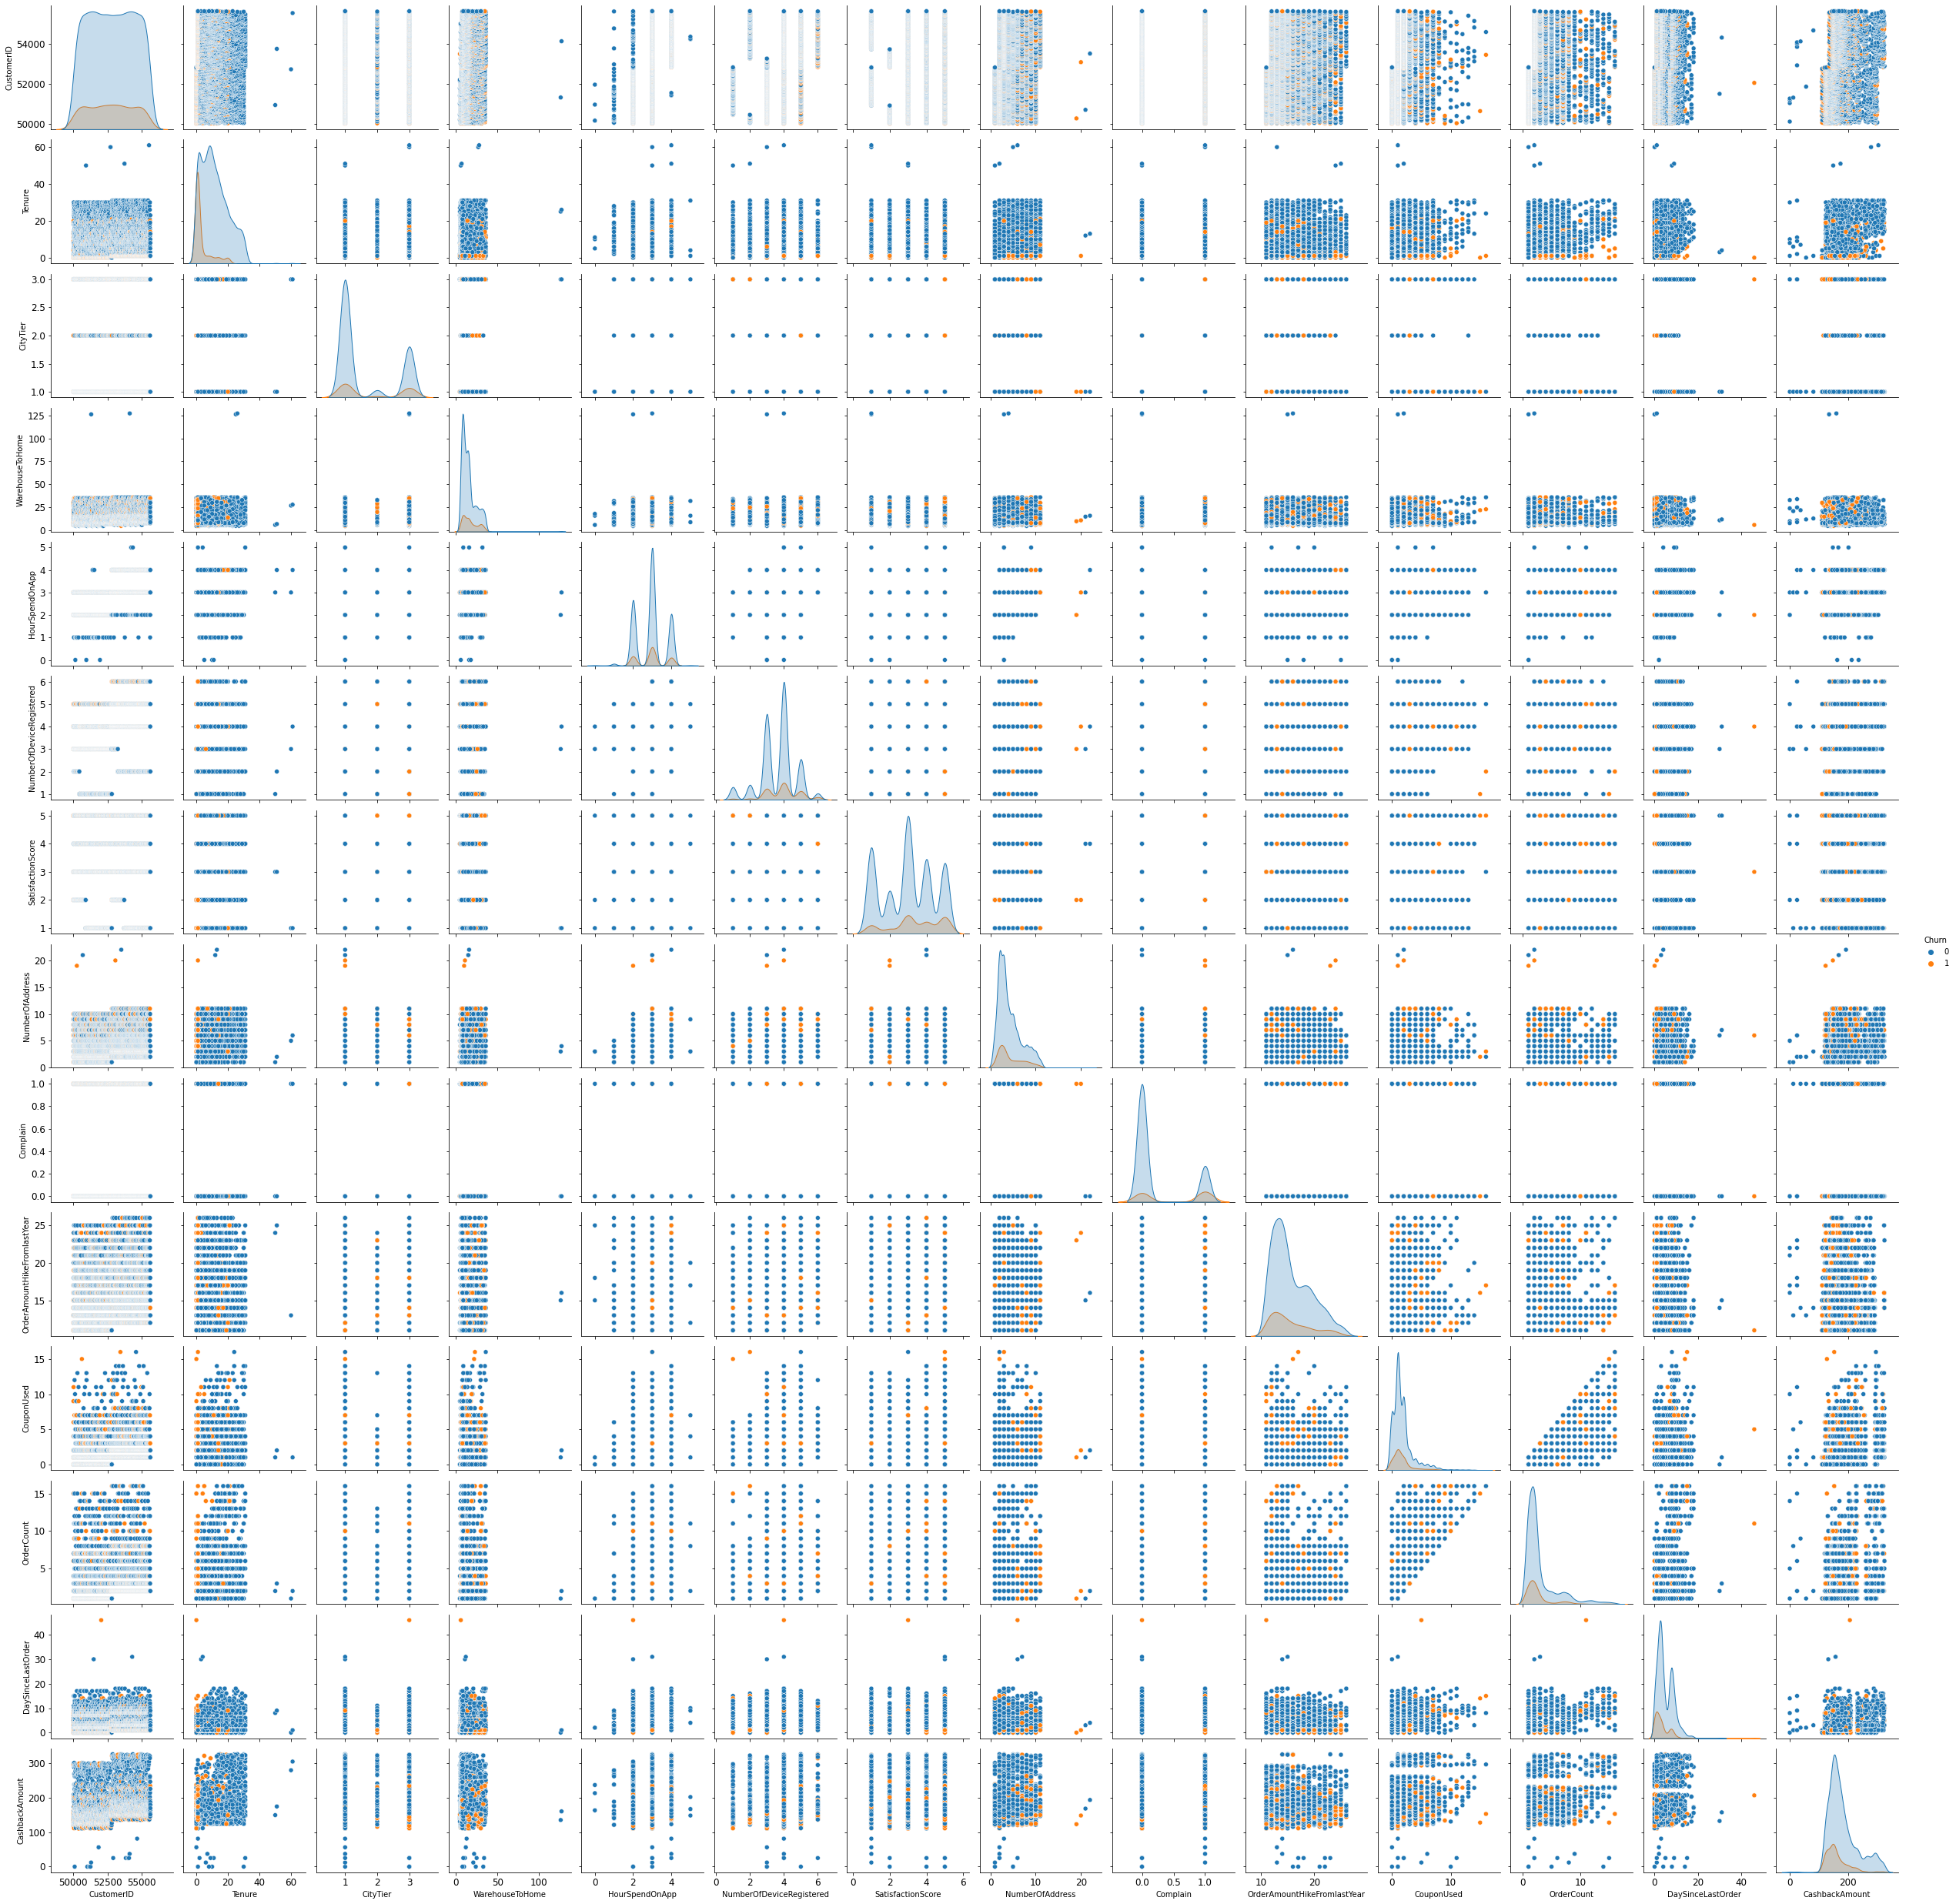

In [ ]:
# Pair Plots (Numeric)
sns.pairplot(df, diag_kind='kde', hue='Churn')

**Hasil Observasi**
Dari pair plots di atas pemisahan scatter plot kurang terlihat dengan bagus, sehingga cukup sulit untuk mendapatkan korelasi fitur yang akurat.

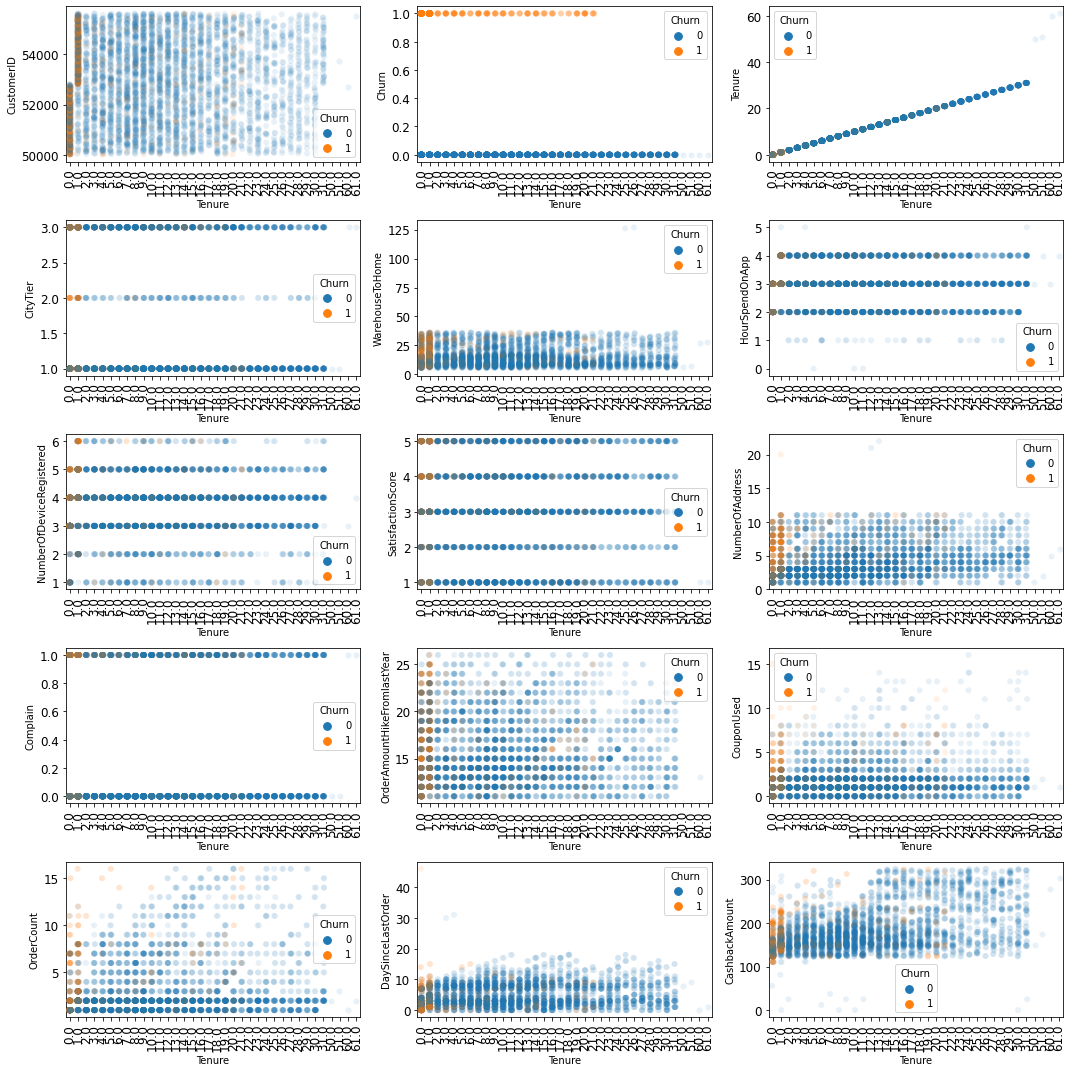

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='Tenure', y=nums[i], hue='Churn', size=6, alpha=0.1)
  plt.tick_params(axis='x', rotation=90)
  plt.tight_layout()

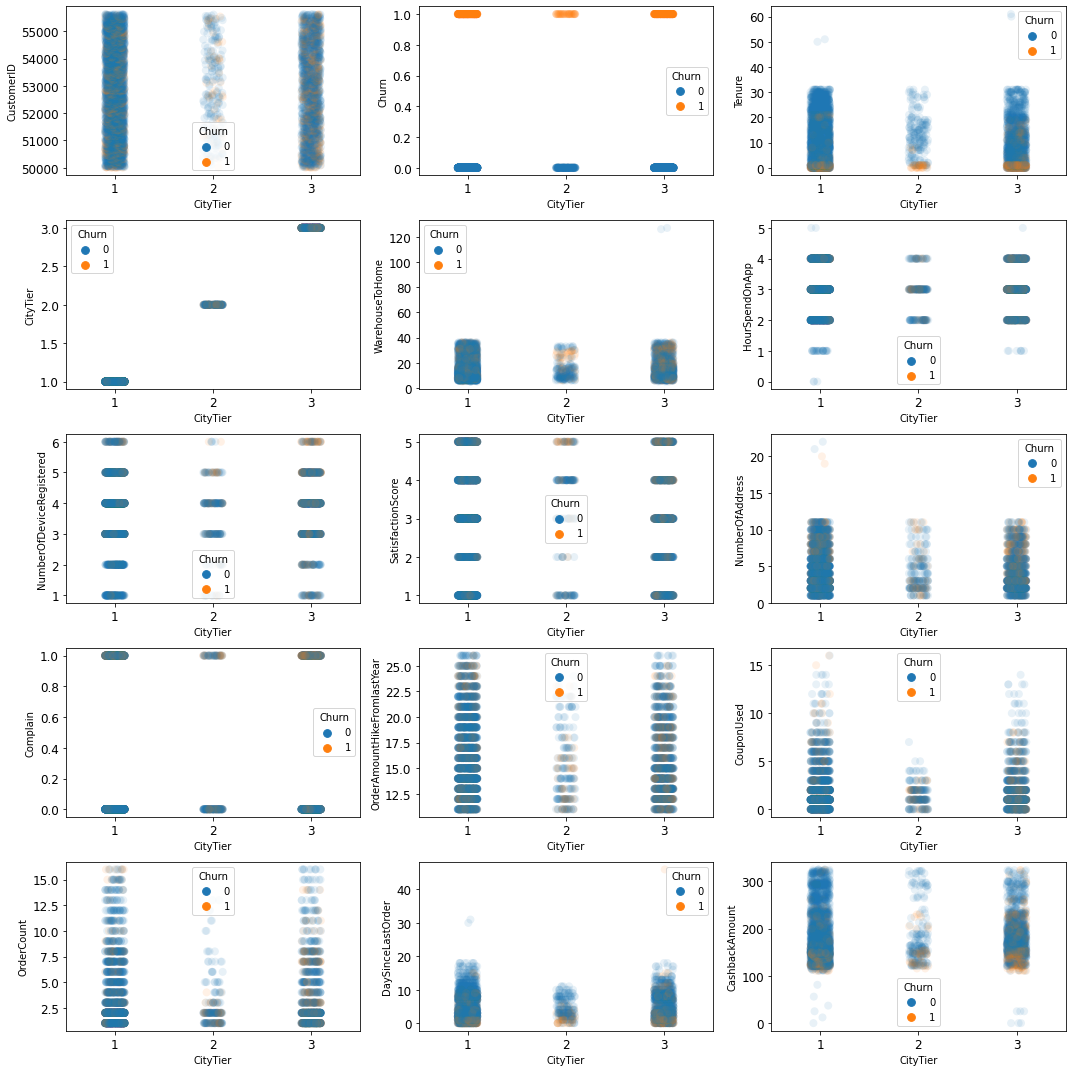

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='CityTier', y=nums[i], hue='Churn', size=8, alpha=0.1)
  plt.tight_layout()

**Hasil Observasi** Korelasi kategori CityTier dengan semua numerical dapat dilihat bahwa tidak ada yang berpengaruh, karena terlihat rata stripplotnya.

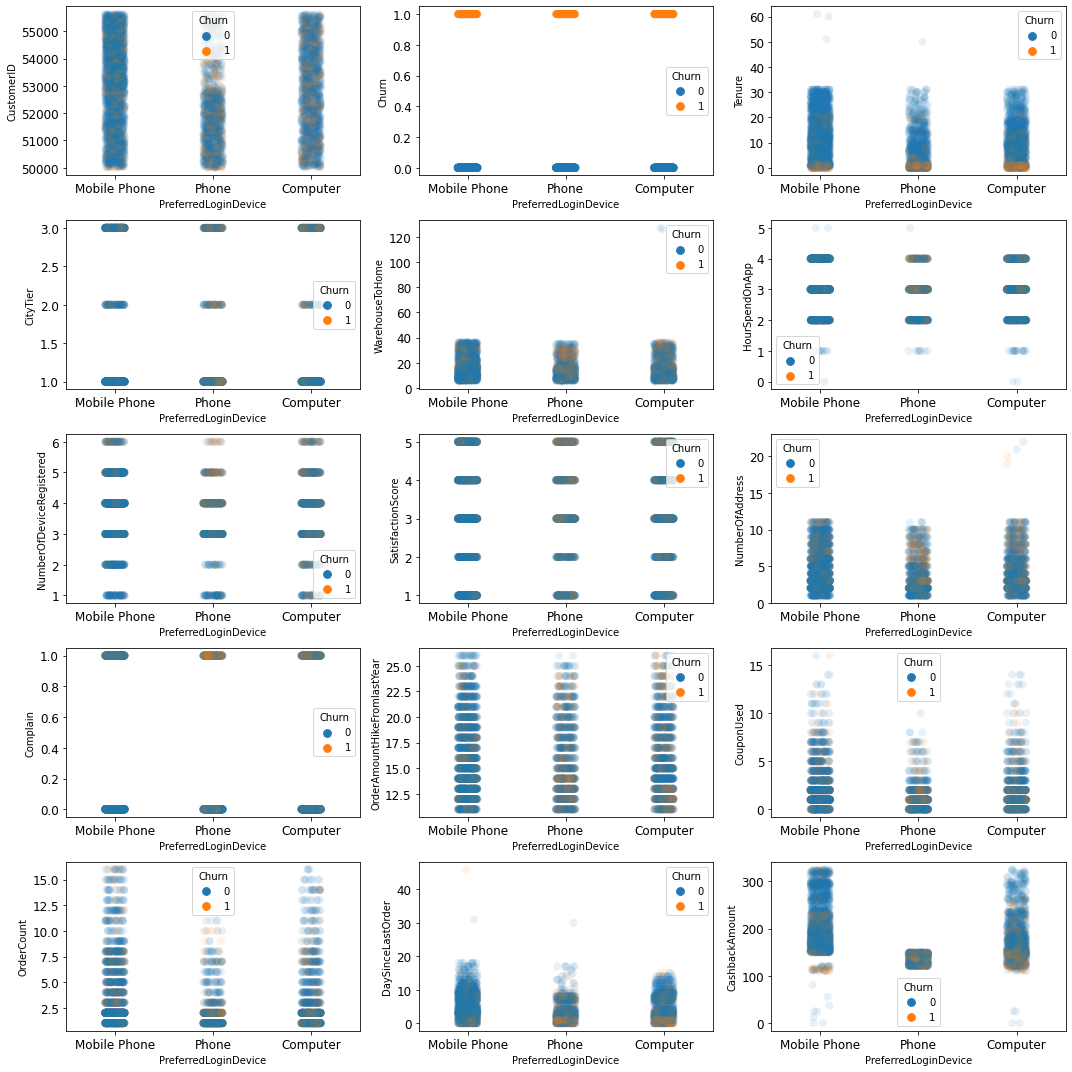

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferredLoginDevice', y=nums[i], hue='Churn', size=8, alpha=0.1)
  plt.tight_layout()

**Hasil Observasi**
Korelasi kategori PreferredLoginDevice dengan semua numerical dapat dilihat bahwa tidak ada yang berpengaruh, karena terlihat rata stripplotnya.

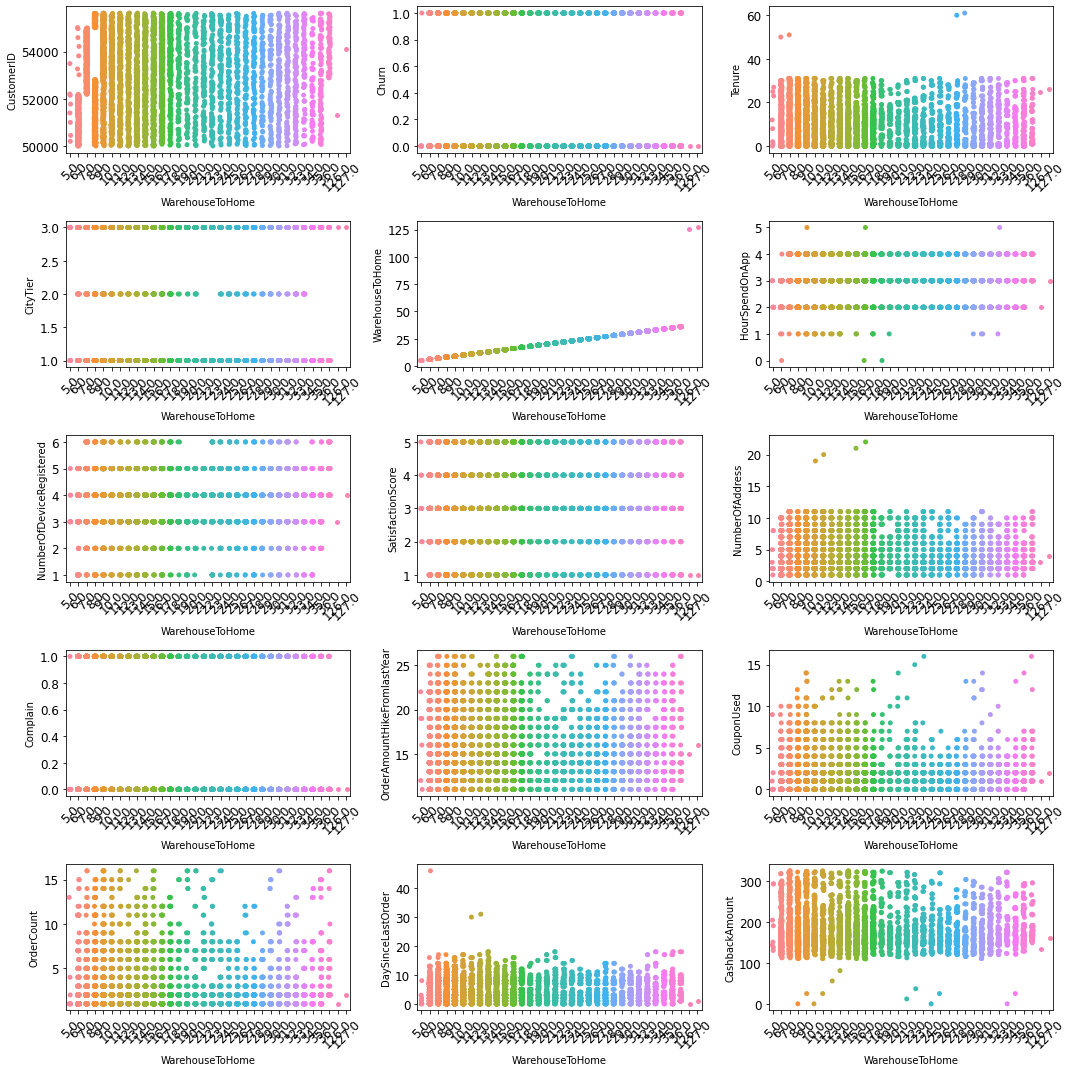

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='WarehouseToHome', y=nums[i])
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()

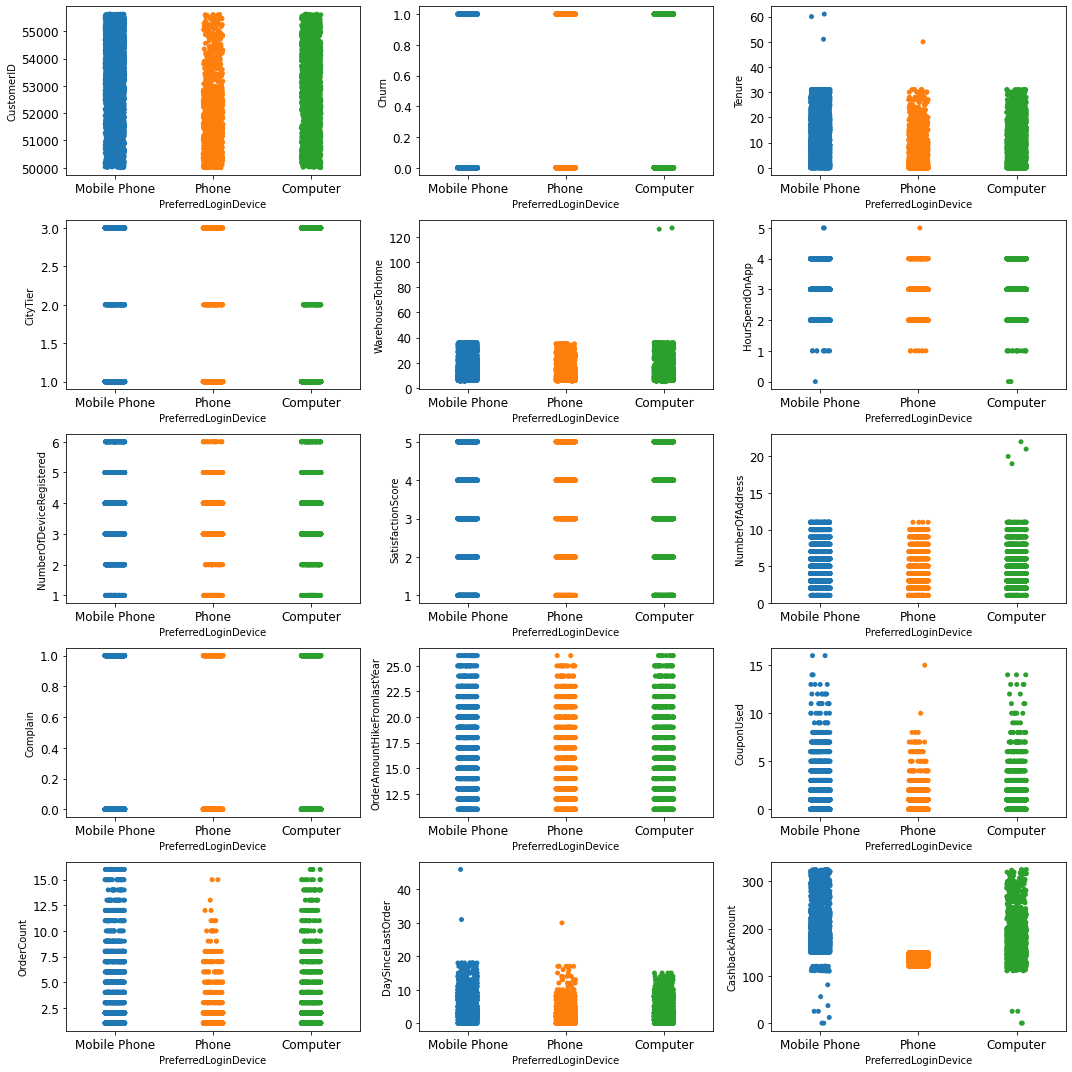

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferredLoginDevice', y=nums[i])
  plt.tight_layout()

**Hasil Observasi**
Korelasi kategori preferred login device dengan semua numerical dapat dilihat bahwa tidak ada yang berpengaruh, karena terlihat rata stripplotnya. Tetapi ada dua korelasi fitur caschback ampount dan Coupon Used dengan preferred login device yaitu terlihat yang menggunakan phone lebih sedikit dibandingkan yang lainnya. 

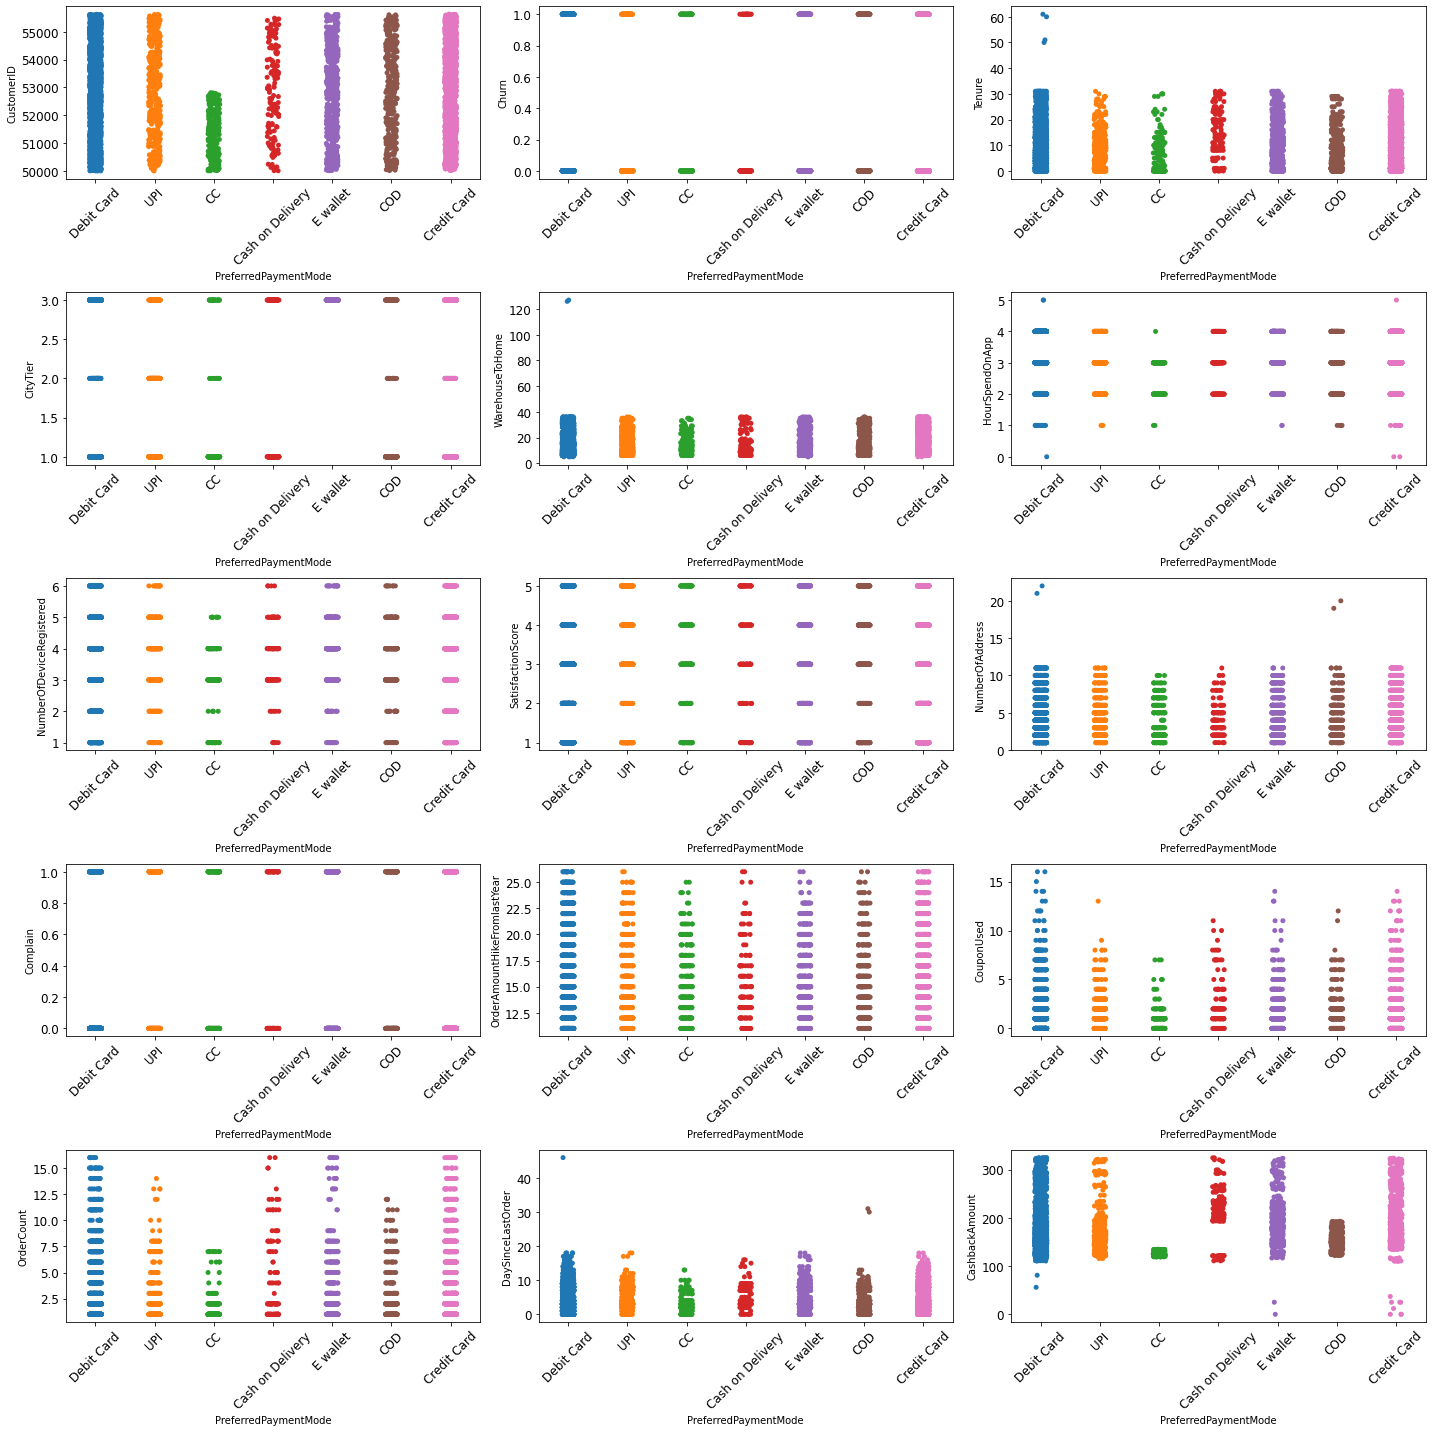

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(20,20))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferredPaymentMode', y=nums[i])
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()
  

**Hasil Observasi**
Korelasi kategori preferred payment method dengan semua numerical dapat dilihat bahwa tidak ada yang berpengaruh, karena terlihat rata stripplotnya. 

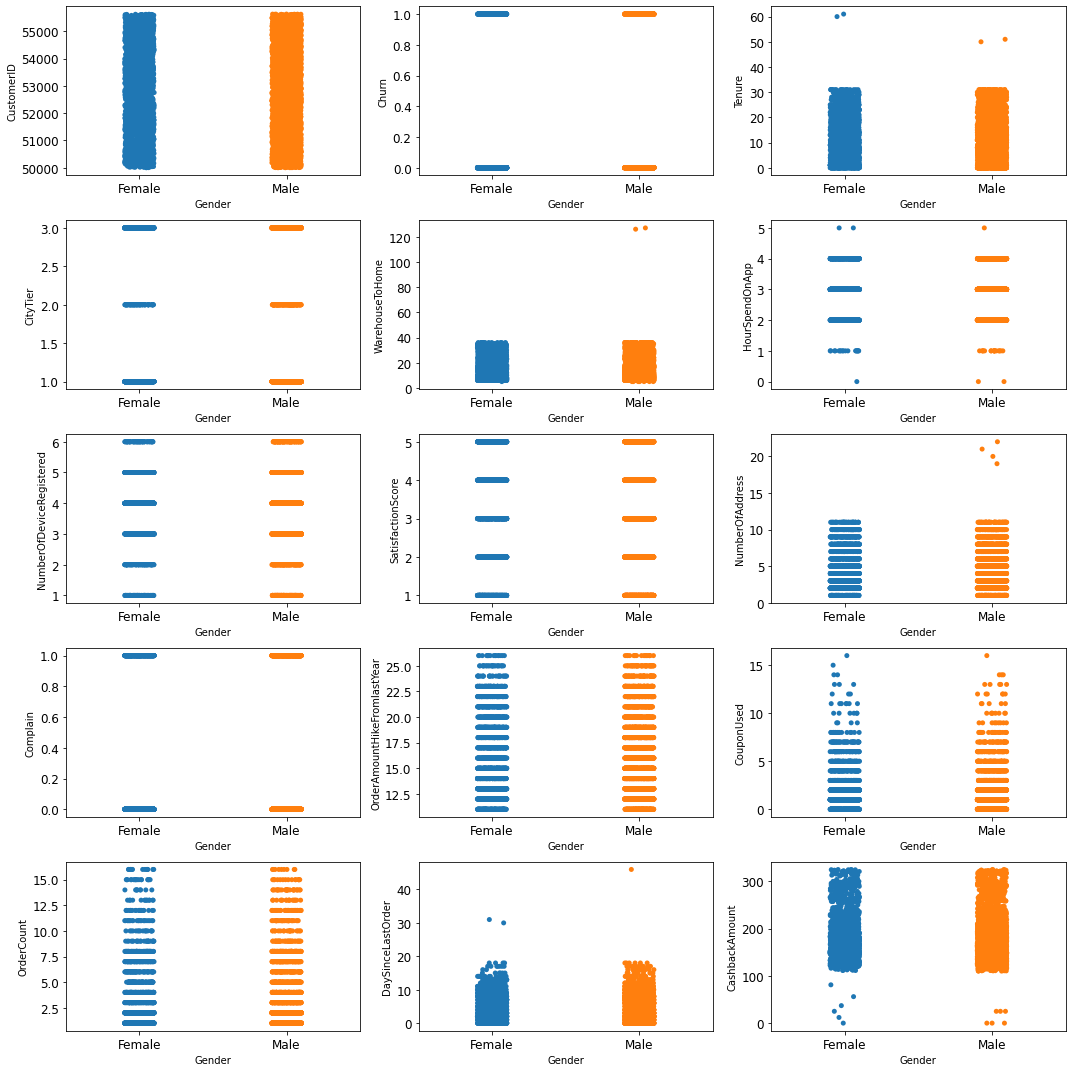

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i])
  plt.tight_layout()

**Hasil Observasi**
Korelasi kategori gender dengan semua numerical dapat dilihat bahwa tidak ada yang berpengaruh, karena terlihat rata stripplotnya. 

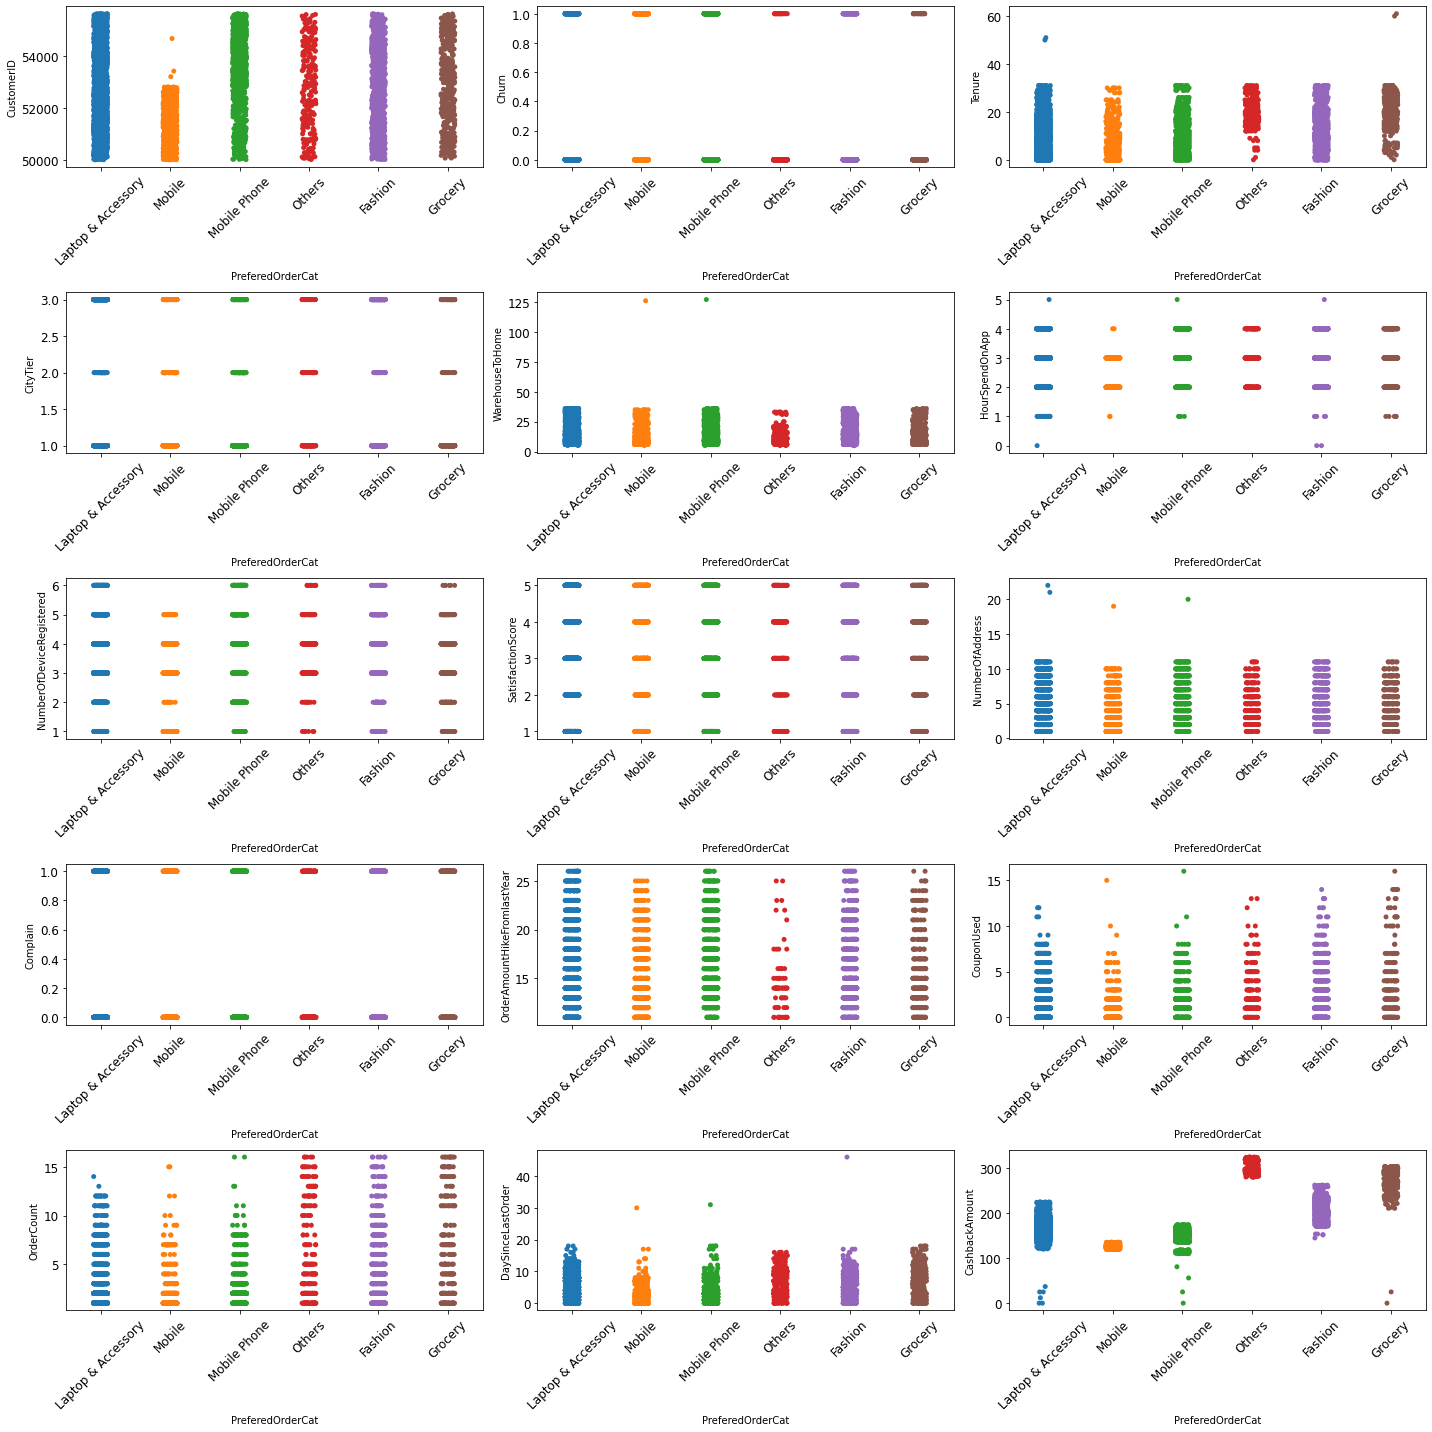

In [ ]:
#Category Plots (Categorical-Numeric) 
fig = plt.figure(figsize=(20,20))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='PreferedOrderCat', y=nums[i])
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()

**Hasil Observasi**
Korelasi kategori preferred order Cat dengan semua numerical dapat dilihat bahwa ada pola yang menarik pada fitur caschback amount, hal ini karena setiap prefred order cat memiliki nilai cashback amount yang bervariasi.

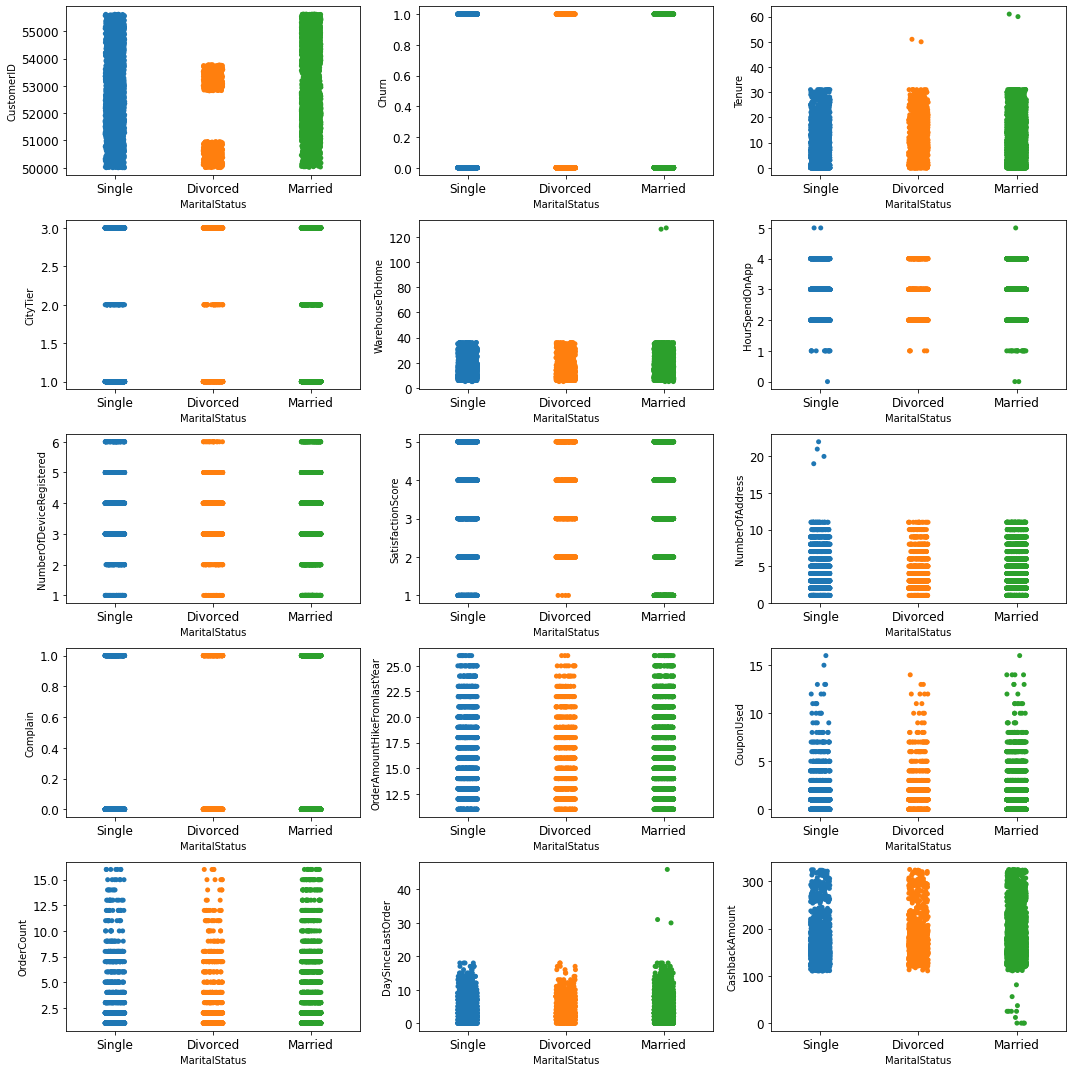

In [ ]:
#Category Plots (Categorical-Numeric) Categorical = 
fig = plt.figure(figsize=(15,15))
for i in range(0,len(nums[0:])):
  ax = fig.add_subplot(5, 3, i+1)
  sns.stripplot(ax=ax, data=df, x='MaritalStatus', y=nums[i])
  plt.tight_layout()

**Hasil Observasi**
Korelasi kategori Marital Status dengan semua numerical dapat dilihat bahwa tidak ada yang berpengaruh, karena terlihat rata stripplotnya. 

## Business Insight

#### Tenure

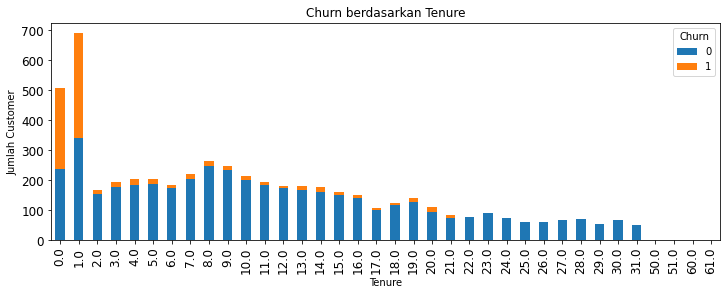

In [ ]:
tenure_churn = pd.crosstab(df["Tenure"], df["Churn"])
tenure_churn.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan Tenure")
tenure_churn
plt.xlabel('Tenure')
plt.ylabel('Jumlah Customer')
plt.show()

Berdasarkan data grafik, dapat diindikasikan bahwa sebagian besar pelanggan yang melakukan churn, banyak berasal dari pelanggan dengan tenure kurang dari 2, atau tergolong pelanggan baru.

#### PreferredLoginDevice

In [ ]:
payment = df.groupby(['PreferredLoginDevice','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,7))
bar = sns.barplot(x="PreferredLoginDevice", y="CustomerID", data=payment, hue="Churn")
plt.xlabel('Metode Login')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation = 60)
plt.title('Churn Berdasarkan Metode Login', fontsize=15)

Dari grafik diatas dapat dilihat bahwa metode Login yang pelanggan gunakan tidak begitu berpengaruh terhadap kemungkinan pelanggan tersebut churn.

#### CityTier

Text(0.5, 1.0, 'Churn Berdasarkan Tingaktan Kota')

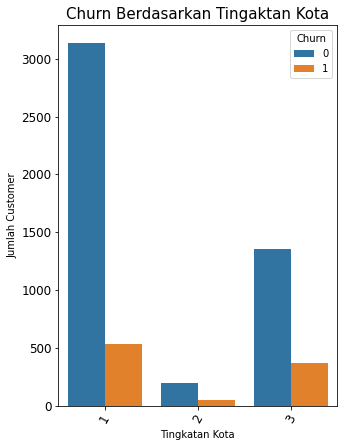

In [ ]:
payment = df.groupby(['CityTier','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,7))
bar = sns.barplot(x="CityTier", y="CustomerID", data=payment, hue="Churn")
plt.xlabel('Tingkatan Kota')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation = 60)
plt.title('Churn Berdasarkan Tingaktan Kota', fontsize=15)

Dari grafik diatas dapat dilihat bahwa Tingkatan kota yang pelanggan gunakan tidak begitu berpengaruh terhadap kemungkinan pelanggan tersebut churn.

#### WarehouseToHome

In [ ]:
tenure_churn = pd.crosstab(df["WarehouseToHome"], df["Churn"])
tenure_churn.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan Jarak Gudang Ke Rumah")
tenure_churn
plt.xlabel('WarehouseToHome')
plt.ylabel('Jumlah Customer')
plt.show()

Dari grafik diatas dapat di simpulkan bahwa pada gudang 5.0, 126.0 dan 127.0 tidak mempunyai posibilitas untuk churn, dan untuk yang lain nya tidak begitu berpengaruh terhadap kemungkinan pelanggan tersebut churn.

#### Payment Mode

In [ ]:
payment = df.groupby(['PreferredPaymentMode','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,7))
bar = sns.barplot(x="PreferredPaymentMode", y="CustomerID", data=payment, hue="Churn")
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation = 60)
plt.title('Churn Berdasarkan Metode Pembayaran', fontsize=15)

In [ ]:
new_df = df.groupby('PreferredPaymentMode')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='PreferredPaymentMode', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Persentase')
plt.xticks(rotation = 60)
plt.title('Churn Berdasarkan Metode Pembayaran', fontsize=15)

Dari grafik diatas dapat dilihat bahwa metode pembayaran yang pelanggan gunakan tidak begitu berpengaruh terhadap kemungkinan pelanggan tersebut churn.

#### Gender

In [ ]:
gender = df.groupby(['Gender','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,6))
bar = sns.barplot(x="Gender", y="CustomerID", data=gender, hue="Churn")
plt.xlabel('Gender')
plt.ylabel('Jumlah Customer')
plt.title('Churn Berdasarkan Gender', fontsize=15)

In [ ]:
new_df = df.groupby('Gender')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='Gender', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Gender')
plt.ylabel('Persentase')
plt.title('Churn Berdasarkan Gender', fontsize=15)

Grafik menunjukkan bahwa pelanggan yang chrun tidak dipengaruhi oleh gender pelanggan.

#### Hour Spend on App

In [ ]:
hour = df.groupby(['HourSpendOnApp','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(5,6))
bar = sns.barplot(x="HourSpendOnApp", y="CustomerID", data=hour, hue="Churn")
plt.xlabel('Spent Hours')
plt.ylabel('Jumlah Customer')
plt.title('Churn Berdasarkan Spent Hours', fontsize=15)

In [ ]:
new_df = df.groupby('HourSpendOnApp')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='HourSpendOnApp', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Spent Hours')
plt.ylabel('Persentase')
plt.title('Churn Berdasarkan Spent Hours', fontsize=15)

Dari grafik yang diperoleh menunjukkan bahwa banyaknya waktu yang dihabiskan oleh pelanggan dalam menggunakan aplikasi atau mengkases website tidak memiliki korelasi dengan potensi pelanggan tersebut untuk churn.

#### Number of Device Registered

Text(0.5, 1.0, 'Churn Berdasarkan Banyaknya Device')

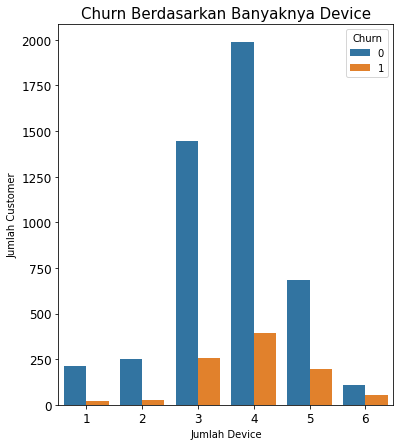

In [ ]:
device = df.groupby(['NumberOfDeviceRegistered','Churn']).nunique('customerID').reset_index()
fig, ax =  plt.subplots(1,1,figsize=(6,7))
bar = sns.barplot(x="NumberOfDeviceRegistered", y="CustomerID", data=device, hue="Churn")
plt.xlabel('Jumlah Device')
plt.ylabel('Jumlah Customer')
plt.title('Churn Berdasarkan Banyaknya Device', fontsize=15)

In [ ]:
new_df = df.groupby('NumberOfDeviceRegistered')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='NumberOfDeviceRegistered', y='Percent', hue='Churn', kind='bar', data=new_df)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
g.ax.set_ylim(0,100)
plt.xlabel('Jumlah Device')
plt.ylabel('Persentase')
plt.title('Churn Berdasarkan Banyaknya Device', fontsize=15)

Dari grafik dapat disimpulkan bahwa semakin banyaknya device yang dimiliki pelanggan maka tingkat churn pelanggan akan semakin tinggi.

#### Prefered Order Cat

In [ ]:
sns.countplot(x='PreferedOrderCat', data=df, hue='Churn')
plt.title('Churn Berdasarkan Prefered Order Cat')

Berdasarakan grafik di atas, Prefered Order Cat 'Mobile Phone' memiliki churn terbanyak.

#### Satisfaction Score

In [ ]:
sns.countplot(x='SatisfactionScore', data=df, hue='Churn')
plt.title('Churn Berdasarkan Satisfaction Score')

Berdasarakan grafik di atas, Satisfaction Score 3, 4, 5 masih mengalami banyak churn.

#### Marital Status

In [ ]:
sns.countplot(x='MaritalStatus', data=df, hue='Churn')
plt.title('Churn Berdasarkan Marital Status')

Berdasarakan grafik di atas, customer yang masih single mengalami banyak churn, sedangkan customer yang mengalami divorced yang sedikit mengalami churn.

#### Number Of Address

In [ ]:
sns.countplot(x='NumberOfAddress', data=df, hue='Churn')
plt.title('Churn Berdasarkan Number Of Address')

Berdasarakan grafik di atas, Number Of Address yang banyak melakuka churn adalah 2 dan 3.

#### Complain

In [ ]:
sns.countplot(x='Complain', data=df, hue='Churn')
plt.title('Churn Berdasarkan Complain')

Berdasarakan grafik di atas, customer yang melakukan complain mengalami banyak churn dibandingkan dengan yang tidak complain.

#### Order Amount Hike from Last Year

In [ ]:
OAH_churn = pd.crosstab(df["OrderAmountHikeFromlastYear"], df["Churn"])
OAH_churn.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan Order Amount Hike")
OAH_churn
plt.xlabel('% Order Amount Hike')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Berdasarkan grafik, semakin rendah persentase kenaikan order dari tahun lalu, terutama pada range 11 - 15, tingkat churn lumayan tinggi. Namun range diatas 16-25 ini kurang signifkan karena setiap persentase selalu ada pelanggan yang churn.

#### Coupon Used

In [ ]:
CU_churn = pd.crosstab(df["CouponUsed"], df["Churn"])
CU_churn.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan # of Used Coupon")
CU_churn
plt.xlabel('# Used Coupon')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Pada grafik diatas, terlihat bahwa tingkat pelanggan yang churn lebih banyak pada pelanggan yang menggunakan sedikit kupon (1-2 saja) bahkan oleh pelanggan yang tidak menggunakan kupon sama sekali

#### Order Count

In [ ]:
OC_churn = pd.crosstab(df["OrderCount"], df["Churn"])
OC_churn.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan # Order Count")
OC_churn
plt.xlabel('# Order Count')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Dari grafik diatas, maka pelanggan yang hanya memesan 1-2 kali cenderung churn, ada kemungkinan pelanggan tipe ini hanya coba - coba dan tidak merasa cocok atau disebut one time buyer

#### Day Since Last Order

In [ ]:
DLO_churn = pd.crosstab(df["DaySinceLastOrder"], df["Churn"])
DLO_churn.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan # Day Since Last Order")
DLO_churn
plt.xlabel('# Days Since Last Order')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Dari grafik diatas, maka pelanggan yang cenderung churn merupakan pelanggan yang baru baru ini melakukan order. Hal ini dimungkinkan karena adanya pelanggan yang merasa kecewa akan transaksi yang dilakukan

#### Cashback Amount

In [ ]:
dfCA = df
dfCA['CashbackAmountGroup'] = np.where(dfCA['CashbackAmount']<125,'Low',
                                      np.where(dfCA['CashbackAmount']<175, 'Medium', 'High'))
dfCA.head()

In [ ]:
DLO_CA = pd.crosstab(dfCA["CashbackAmountGroup"], dfCA["Churn"])
DLO_CA.plot(kind = 'bar', stacked = 'true', title = "Churn berdasarkan Cashback Amount")
DLO_CA
plt.xlabel('Cashback Amount Type')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Pada grafik ini, user dikelompokkan berdasarkan jumlah cashback yang diperoleh. Kami menentukan bahwa customer yang mendapat cashback kurang dari 125 dikategorikan sebagai "Low", mendapat 125-175 dikategorikan sebagai 'Medium", dan lebih dari 175 sebagai high.

Pada data grafik, tidak ada perbedaan berarti dari jumlah pelanggan yang churn dengan total cashback yang diterima. Hal ini juga senada dengan heatmap bahwa korelasi antara jumlah cashback yang diperoleh dengan pelanggan yang churn tidak berkolerasi signfikan